# Data Science Salaries

### Objective
To find the best location to work as a Data Scientist.

With this information, one can guide their career by selecting companies in these locations whose values align with theirs.

### Table of Contents:

- Section 1: Data Science Salaries
- Section 2: Cost of Living Index
- Section 3: Combining Data Science Salaries with Cost of Living
- Section 4: Visualising the Data
- Section 5: Bonus Objectives


YOE vs salary per city
consider
tag
faang
education

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px


# Section 1: Data Science Salaries

First, we read the salary data into a Data Frame and perform a basic sense check the available data

In [2]:
# Read STEM Salaries
sdf = pd.read_csv('/kaggle/input/data-science-and-stem-salaries/Levels_Fyi_Salary_Data.csv')
sdf.index.name = 'entry_id'
print(sdf.shape)

(62642, 29)


In [3]:
sdf.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Check the data
with pd.option_context('display.max_columns', None):
    display(sdf.head(5))

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
entry_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


### Location data

Location information can be improved by splitting them into their own columns, for City, State and Country

In [5]:
# Check location data
sdf.location.value_counts()

Seattle, WA                      8701
San Francisco, CA                6797
New York, NY                     4562
Redmond, WA                      2649
Mountain View, CA                2275
                                 ... 
San Fernando, LB, Philippines       1
Suwanee, GA                         1
Oxford, MS                          1
Wayne, PA                           1
Hilbert, WI                         1
Name: location, Length: 1050, dtype: int64

It looks like not all locations are US-specific.

In [6]:
# Create a city ID so that we can use as a lookup
sdf[['city','state','country']] = sdf.location.str.split(", ",expand=True,n=2)
sdf.country.fillna('United States',inplace=True)
sdf['city_id'] = sdf.agg(lambda df: f"{df['city']}_{df['country']}",axis = 1)

sdf.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,state,country,city_id
entry_id,,,,,,,,,,,,,,,,,,,,,
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,NaN,NaN,Redwood City,CA,United States,Redwood City_United States
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,NaN,NaN,San Francisco,CA,United States,San Francisco_United States
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,NaN,NaN,Seattle,WA,United States,Seattle_United States
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,NaN,NaN,Sunnyvale,CA,United States,Sunnyvale_United States
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,NaN,NaN,Mountain View,CA,United States,Mountain View_United States


For this experiment, we will remove FAANG and Microsoft data, as they are some industry heavyweights that may skew the overall data. We can explore this excluded data later.

In [7]:
faangless_sdf = sdf.copy()

faang_list = ['Facebook','Apple','Amazon','Netflix','Google','Microsoft']
faang_list = '|'.join(faang_list)

faangless_s = faangless_sdf.company.str.contains(faang_list,case=False)

fdf = faangless_sdf = faangless_sdf[faangless_s == False]

print('Original data size  : ' , sdf.shape)
print('FAANG-less data size: ' , fdf.shape)
print(sdf.shape[0] - fdf.shape[0], 'rows removed')
print(round((fdf.shape[0] / sdf.shape[0])*100,1) , '% remaining')



Original data size  :  (62642, 33)
FAANG-less data size:  (39455, 33)
23187 rows removed
63.0 % remaining


Next, we filter for job titles with the words "data" in them. This could range from Data Scientists, Engineers to Analysts.

In [8]:
# Filter for all Data-related job titles only

fds = fdf[fdf.title.str.contains('data',case=False)]

print(fds.shape)
fds.head()

(1711, 33)


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,city,state,country,city_id
entry_id,,,,,,,,,,,,,,,,,,,,,
419,6/5/2018 14:06:30,LinkedIn,Senior,Data Scientist,233000,"San Francisco, CA",4.0,0.0,Data Analysis,162000.0,...,0,0,0,0,NaN,NaN,San Francisco,CA,United States,San Francisco_United States
444,6/8/2018 17:55:09,ebay,26,Data Scientist,180000,"San Jose, CA",10.0,5.0,NaN,0.0,...,0,0,0,0,NaN,NaN,San Jose,CA,United States,San Jose_United States
454,6/10/2018 19:39:35,Twitter,Staff,Data Scientist,500000,"San Francisco, CA",4.0,4.0,ML / AI,200000.0,...,0,0,0,0,NaN,NaN,San Francisco,CA,United States,San Francisco_United States
523,6/25/2018 8:45:29,Tesla,Senior Engineer,Data Scientist,168000,"Palo Alto, CA",8.0,3.0,Mechanical Engineering,118000.0,...,0,0,0,0,NaN,NaN,Palo Alto,CA,United States,Palo Alto_United States
535,6/26/2018 21:37:46,GrubHub,II,Data Scientist,187000,"New York, NY",4.0,1.0,ML / AI,150000.0,...,0,0,0,0,NaN,NaN,New York,NY,United States,New York_United States


In [9]:
fds.title.value_counts()

Data Scientist    1711
Name: title, dtype: int64

It appears only Data Scientists are available in the job titles. This is great!

# Section 2: Cost of Living Index

Next, we read the cost of living index by city dataset into a dataframe and rename columns for easy consumption.

In [10]:
# Read the Cost of Living Index data
cdf = pd.read_csv('/kaggle/input/cost-of-living-index-by-city-2022/costofliving.csv')

# Rename columns
cdf.rename(columns = {
    'Rent Index':'rent', 
    'Cost of Living Index':'coli',
    'Cost of Living Plus Rent Index':'colri',
    'Groceries Index':'groceries',
    'Restaurant Price Index':'restaurants',
    'Local Purchasing Power Index':'lppi'}
          , inplace = True)


In [11]:
# Check the data
cdf.head(15)

,Rank,City,coli,rent,colri,groceries,restaurants,lppi
0,NaN,"Hamilton, Bermuda",149.02,96.10,124.22,157.89,155.22,79.43
1,NaN,"Zurich, Switzerland",131.24,69.26,102.19,136.14,132.52,129.79
2,NaN,"Basel, Switzerland",130.93,49.38,92.70,137.07,130.95,111.53
3,NaN,"Zug, Switzerland",128.13,72.12,101.87,132.61,130.93,143.40
4,NaN,"Lugano, Switzerland",123.99,44.99,86.96,129.17,119.80,111.96
5,NaN,"Lausanne, Switzerland",122.03,59.55,92.74,122.56,127.01,127.01
6,NaN,"Beirut, Lebanon",120.47,27.76,77.01,141.33,116.95,15.40
7,NaN,"Bern, Switzerland",118.16,46.12,84.39,118.37,120.88,112.46
8,NaN,"Geneva, Switzerland",114.05,75.05,95.77,112.70,126.31,120.60
9,NaN,"Stavanger, Norway",104.61,35.38,72.16,102.46,107.51,85.90


Just like before, we should create separate columns for city, state and country, which also ends up being our city_id index for matching against the dataframes in Section 1

In [12]:
cdf[['city','state_','country_']] = cdf.City.str.split(", ",expand=True,n=2)

mask = cdf['state_'].str.len() > 2
cdf['state'] = np.where(mask, None, cdf['state_'])
cdf['country'] = np.where(mask, cdf['state_'], cdf['country_'])

cdf.drop(['Rank','City','state_','country_'], axis=1, inplace=True)
cdf['city_id'] = cdf.agg(lambda df: f"{df['city']}_{df['country']}",axis = 1)

cdf.set_index('city_id', inplace = True)

cdf.head(15)

,coli,rent,colri,groceries,restaurants,lppi,city,state,country
city_id,,,,,,,,,
Hamilton_Bermuda,149.02,96.10,124.22,157.89,155.22,79.43,Hamilton,None,Bermuda
Zurich_Switzerland,131.24,69.26,102.19,136.14,132.52,129.79,Zurich,None,Switzerland
Basel_Switzerland,130.93,49.38,92.70,137.07,130.95,111.53,Basel,None,Switzerland
Zug_Switzerland,128.13,72.12,101.87,132.61,130.93,143.40,Zug,None,Switzerland
Lugano_Switzerland,123.99,44.99,86.96,129.17,119.80,111.96,Lugano,None,Switzerland
Lausanne_Switzerland,122.03,59.55,92.74,122.56,127.01,127.01,Lausanne,None,Switzerland
Beirut_Lebanon,120.47,27.76,77.01,141.33,116.95,15.40,Beirut,None,Lebanon
Bern_Switzerland,118.16,46.12,84.39,118.37,120.88,112.46,Bern,None,Switzerland
Geneva_Switzerland,114.05,75.05,95.77,112.70,126.31,120.60,Geneva,None,Switzerland


Add a column "Easy 2 Live", which shows the relative local purchasing power of the city compared to the general cost of living there.

In [13]:
cdf['e2l'] = cdf['lppi'] / cdf['coli']

Good! Now we have everything we need to combine the two data sets.

# Section 3: Combining Data Science Salaries with Cost of Living

Since we need to know which cities are the best, we should use `city_id` as the index, and thus do a "`cdf` left join `fds` on `city_id` "

In [14]:
fdsc = fds.copy()
fdsc = fdsc.groupby('city_id').agg(
    avg_tc = pd.NamedAgg(column = 'totalyearlycompensation', aggfunc = 'mean'),
    avg_bs = pd.NamedAgg(column = 'basesalary', aggfunc = 'mean'),
    avg_sgv = pd.NamedAgg(column = 'stockgrantvalue', aggfunc = 'mean'),
    avg_bon = pd.NamedAgg(column = 'bonus', aggfunc = 'mean'),
    avg_yoe = pd.NamedAgg(column = 'yearsofexperience', aggfunc = 'mean'),
    avg_yac = pd.NamedAgg(column = 'yearsatcompany', aggfunc = 'mean'),
    r_a = pd.NamedAgg(column = 'Race_Asian', aggfunc = 'sum'),
    r_w = pd.NamedAgg(column = 'Race_White', aggfunc = 'sum'),
    r_2plus = pd.NamedAgg(column = 'Race_Two_Or_More', aggfunc = 'sum'),
    r_b = pd.NamedAgg(column = 'Race_Black', aggfunc = 'sum'),
    r_h = pd.NamedAgg(column = 'Race_Hispanic', aggfunc = 'sum'),
    count_ds = pd.NamedAgg(column = 'timestamp', aggfunc = 'count')
    )
fdsc.head()

,avg_tc,avg_bs,avg_sgv,avg_bon,avg_yoe,avg_yac,r_a,r_w,r_2plus,r_b,r_h,count_ds
city_id,,,,,,,,,,,,
Albuquerque_United States,115000.000000,103000.000000,10000.000000,2000.0,1.000000,1.000,0,0,0,0,0,1
Alexandria_United States,98000.000000,98000.000000,0.000000,0.0,4.000000,2.000,0,0,0,0,0,1
Alpharetta_United States,110000.000000,100000.000000,0.000000,10000.0,3.000000,3.000,1,0,0,0,0,1
Amsterdam_Netherlands,118500.000000,90750.000000,15450.000000,12250.0,4.400000,2.375,1,6,0,0,0,20
Ann Arbor_United States,158666.666667,144333.333333,2333.333333,12000.0,12.666667,7.000,0,0,0,0,0,3


In [15]:
cds = cdf.merge(fdsc,on='city_id',how='left')
cds.dropna(subset=['avg_tc','avg_bs'], inplace = True)
cds.head()

,coli,rent,colri,groceries,restaurants,lppi,city,state,country,e2l,...,avg_sgv,avg_bon,avg_yoe,avg_yac,r_a,r_w,r_2plus,r_b,r_h,count_ds
city_id,,,,,,,,,,,,,,,,,,,,,
Zurich_Switzerland,131.24,69.26,102.19,136.14,132.52,129.79,Zurich,None,Switzerland,0.988952,...,5000.000000,6750.000000,1.750000,0.750000,0.0,0.0,0.0,0.0,0.0,4.0
Basel_Switzerland,130.93,49.38,92.70,137.07,130.95,111.53,Basel,None,Switzerland,0.851829,...,0.000000,11000.000000,5.000000,3.000000,0.0,1.0,0.0,0.0,0.0,2.0
New York_United States,100.00,100.00,100.00,100.00,100.00,100.00,New York,NY,United States,1.000000,...,12452.261307,24241.206030,4.276382,1.798995,37.0,22.0,4.0,2.0,3.0,199.0
Berkeley_United States,94.36,88.22,91.48,106.23,78.85,85.78,Berkeley,CA,United States,0.909072,...,0.000000,40000.000000,6.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
San Francisco_United States,93.91,108.42,100.72,97.05,93.40,133.16,San Francisco,CA,United States,1.417953,...,82325.806452,15996.774194,4.880645,1.655000,53.0,30.0,2.0,0.0,2.0,310.0


In [16]:
print('Total count :',cds.count_ds.sum())
print('Original count :', fds.shape[0])
print('Number of entries without matchable cities :', fds.shape[0] - cds.count_ds.sum())
print(round((cds.count_ds.sum() / fds.shape[0])*100,2),'% of entries remain')

Total count : 1322.0
Original count : 1711
Number of entries without matchable cities : 389.0
77.26 % of entries remain


# Section 4: Visualising the Data

Check both Average Total Compensation and Average Base Salaries per City against the Cost of Living in the city. Also, a color scale is added for relative Ease of Living in the country by comparing Local Purchasing Power against Cost of Living

In [17]:
fig = px.scatter(cds, x='coli', y='avg_tc', text=cds.index ,size=cds['count_ds'], 
                 color='e2l',trendline="lowess",trendline_color_override="white",
                 title='Total Compensation vs Cost of Living Index', size_max=100,
                    labels={
                     "avg_tc":"Average Total Compensation",
                     "coli":"Cost of Living Index",
                     "e2l":"Ease of Living"}
                )

fig.update_traces(marker_sizemin=2, textposition='top center')
fig.update_layout(
    autosize=False,
    width=1600,
    height=900,)

fig.show()

In [18]:
fig = px.scatter(cds, x='coli', y='avg_bs', text=cds.index, size=cds['count_ds'], 
                 color='e2l',trendline="lowess",trendline_color_override="white",
                 title='Base Salary vs Cost of Living Index', size_max=100,
                    labels={
                     "avg_bs":"Base Salary",
                     "coli":"Cost of Living Index",
                     "e2l":"Ease of Living"}
                )

fig.update_traces(marker_sizemin=2, textposition='top center')
fig.update_layout(
    autosize=False,
    width=1600,
    height=900,)

fig.show()

Observations:
- Both Basel and Zurich in Switzerland are expensive to live in, but also do not provide sufficiently high incomes for data scientists.
- Both New York and San Francisco are popular and pay well, but San Francisco has a higher salary and lower cost of living of the two, and is thus preferred. This can be inferred to the Bay Area salaries.
- Oakland and San Antonio may be outliers, and worth investigating the data set further.
- Los Angeles, San Jose and Portland in the US are good alternatives aside from SF and NYC
- Bangalore is one of the best places to live in for its income range, due to high LPPI/COL ratio.

# Section 5: Bonus Questions

#### Test impact of Race on Salaries

H_0 : Base salaries of Whites are the same as that of Asians  
H_1 : Base salaries of Whites are more than that of Asians

Use a 95% CI for a one-tailed test.

In [19]:
from scipy.stats import ttest_ind

a = fds.loc[fds.Race_Asian == 1,'basesalary']
w = fds.loc[fds.Race_White == 1,'basesalary']

print('Average salary difference:', w.mean() - a.mean())

print(ttest_ind(a,w,equal_var=True))

Average salary difference: 5104.170641431672
Ttest_indResult(statistic=-1.1656911491570852, pvalue=0.24422180841308064)


Since p-value is 0.24 , which is more than 0.05, H_0 is accepted

#### Explore Education levels

<AxesSubplot:>

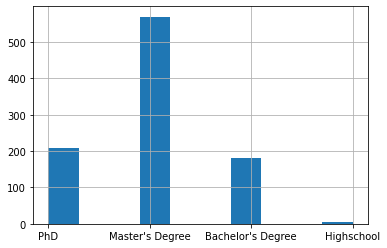

In [20]:
fds.Education.hist()